IMPORT MAPEL

In [3]:
import mapof.elections as mapof

GENERATE SINGLE ELECTION

In [5]:
election = mapof.generate_approval_election(culture_id='resampling',
                                            num_voters=100,
                                            num_candidates=100,
                                            params={'rel_size_central_vote': 0.4, 'phi': 0.1})

CREATE THE VOTE-MICROSCOPE

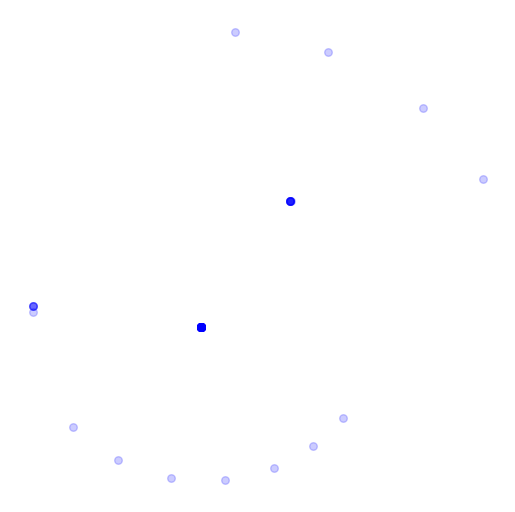

In [6]:
election.compute_distances(distance_id='hamming', object_type='vote')
election.embed(object_type='vote')
election.print_map(alpha=0.2, object_type='vote')

CREATE THE CANDIDATE-MICROSCOPE

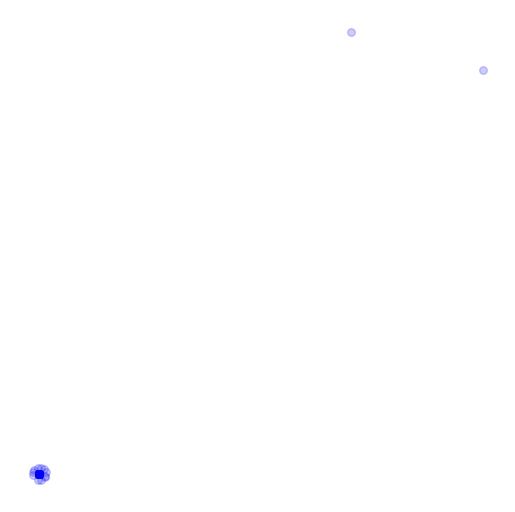

In [7]:
election.compute_distances(distance_id='hamming', object_type='candidate')
election.embed(object_type='candidate')
election.print_map(alpha=0.2, object_type='candidate')

CREATE MICROSCOPE FROM VOTES

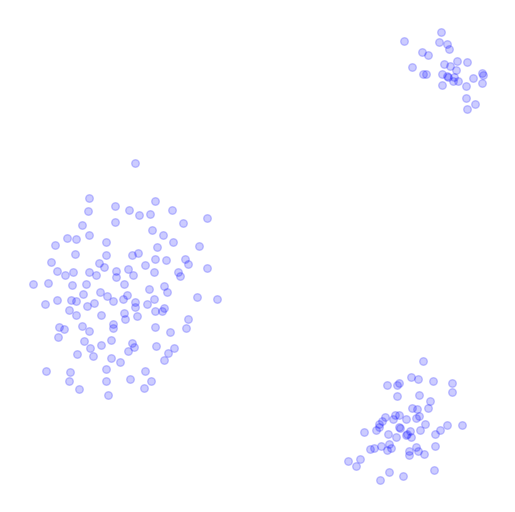

In [10]:
from prefsampling.approval import resampling
from prefsampling.core import concatenation

cv1 = set(range(0, 20 + 1))
cv2 = set(range(20, 40 + 1))
cv3 = set(range(40, 70 + 1))

votes = concatenation(
    [120, 60, 30],  # num_voters per sampler
    100,  # num_candidates
    [resampling, resampling, resampling],  # list of samplers
    [{'phi': 0.25, 'rel_size_central_vote': 0.2, 'central_vote': cv1},
     {'phi': 0.15, 'rel_size_central_vote': 0.2, 'central_vote': cv2},
     {'phi': 0.1, 'rel_size_central_vote': 0.3, 'central_vote': cv3}]  # parameters of the samplers
)


election = mapof.generate_approval_election_from_votes(votes)

election.compute_distances(object_type='vote', distance_id='hamming')
election.embed(object_type='vote')
election.print_map(alpha=0.2, object_type='vote')